In [1]:
import os

import numpy as np

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

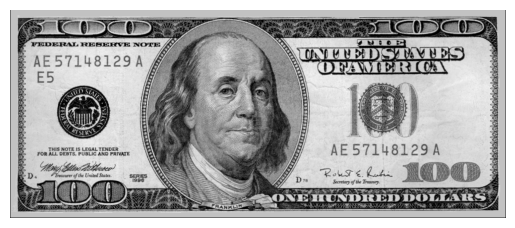

In [2]:
gray_img = Image.open("../../DIP3E_Original_Images_CH03/Fig0314(a)(100-dollars).tif")
gray_img = np.asarray(gray_img)

plt.imshow(gray_img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [3]:
row, col = gray_img.shape

lst = []
for i in range(row):
    for j in range(col):
        lst.append(np.binary_repr(gray_img[i, j], width = 8)) # width = no. of bits

eight_bit_img = (np.array([int(i[0]) for i in lst], dtype = np.uint8) * 128).reshape(gray_img.shape[0], gray_img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst], dtype = np.uint8) * 64).reshape(gray_img.shape[0], gray_img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst], dtype = np.uint8) * 32).reshape(gray_img.shape[0], gray_img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst], dtype = np.uint8) * 16).reshape(gray_img.shape[0], gray_img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst], dtype = np.uint8) * 8).reshape(gray_img.shape[0], gray_img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst], dtype = np.uint8) * 4).reshape(gray_img.shape[0], gray_img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst], dtype = np.uint8) * 2).reshape(gray_img.shape[0], gray_img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst], dtype = np.uint8) * 1).reshape(gray_img.shape[0], gray_img.shape[1])

In [4]:
one_bit_img_arr = np.asarray(one_bit_img)
two_bit_img_arr = np.asarray(two_bit_img)
three_bit_img_arr = np.asarray(three_bit_img)
four_bit_img_arr = np.asarray(four_bit_img)
five_bit_img_arr = np.asarray(five_bit_img)
six_bit_img_arr = np.asarray(six_bit_img)
seven_bit_img_arr = np.asarray(seven_bit_img)
eight_bit_img_arr = np.asarray(eight_bit_img)

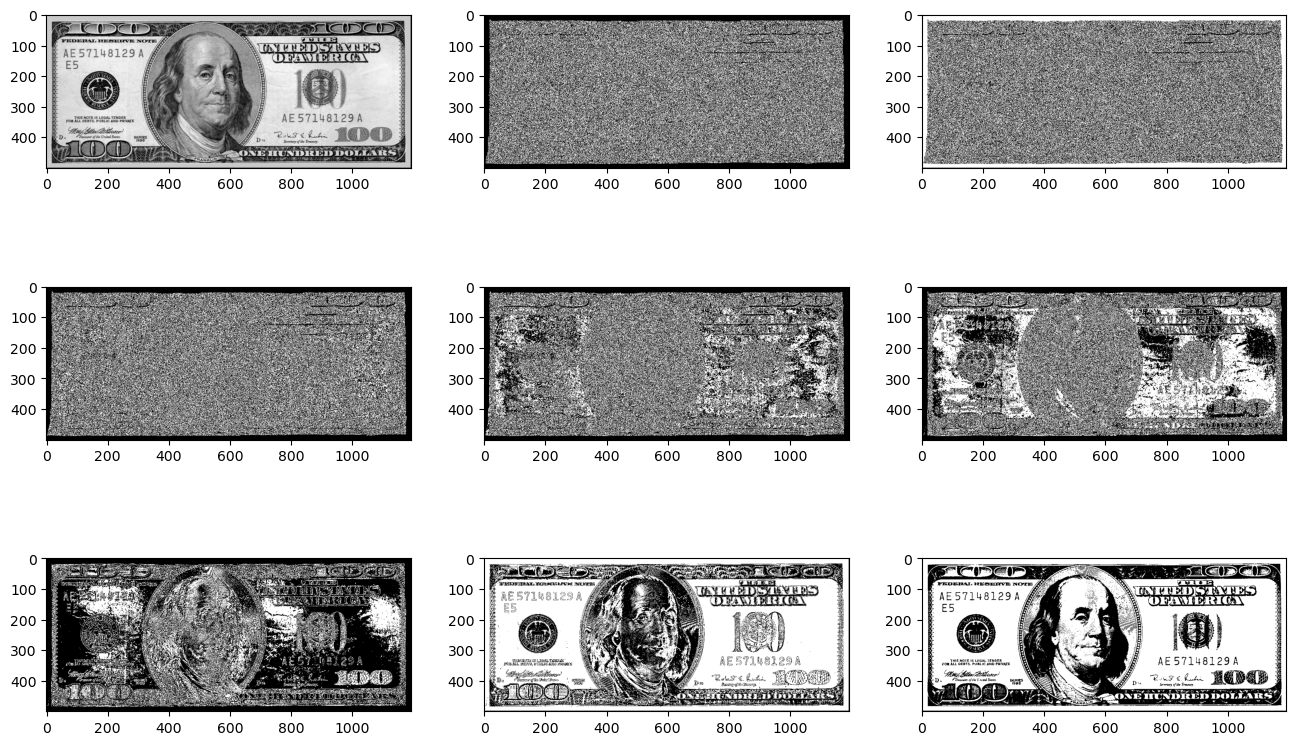

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (16, 10))
ax1.imshow(gray_img, cmap = 'gray')
ax2.imshow(one_bit_img_arr, cmap = 'gray')
ax3.imshow(two_bit_img_arr, cmap = 'gray')
ax4.imshow(three_bit_img_arr, cmap = 'gray')
ax5.imshow(four_bit_img_arr, cmap = 'gray')
ax6.imshow(five_bit_img_arr, cmap = 'gray')
ax7.imshow(six_bit_img_arr, cmap = 'gray')
ax8.imshow(seven_bit_img_arr, cmap = 'gray')
ax9.imshow(eight_bit_img_arr, cmap = 'gray')

In [21]:
def bit_plane(img, k):
    bit_planes = []
    for i in range(k):
        bit_plane = (img >> i) & 1
        bit_plane = bit_plane * 255
        bit_planes.append(bit_plane)
    
    return bit_planes

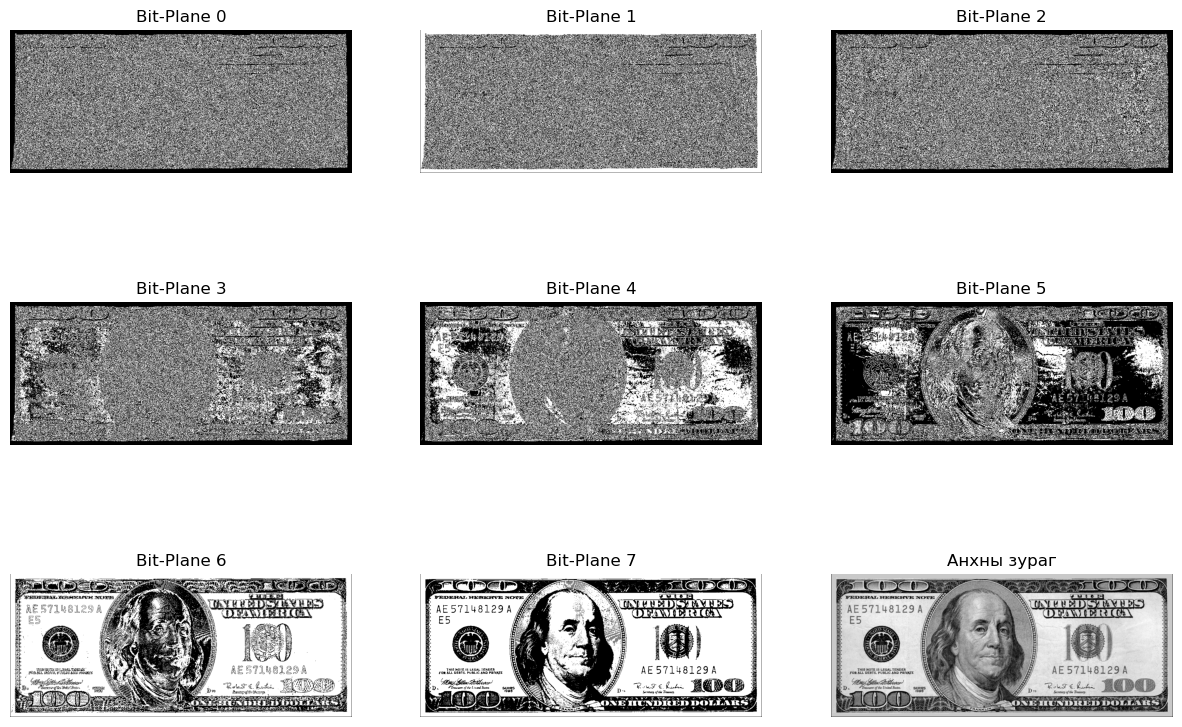

In [22]:
img = Image.open("../../DIP3E_Original_Images_CH03/Fig0314(a)(100-dollars).tif")
img = np.asarray(img)
bit_planes = bit_plane(img, 8)

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
h, w = 0, 0

for j in range(8):
    axes[h][w].imshow(bit_planes[j], cmap = 'gray')
    axes[h][w].set_title(f'Bit-Plane {j}')
    axes[h][w].axis('off')

    w += 1
    if w == 3:
        w = 0
        h += 1

axes[2][2].imshow(img, cmap = 'gray')
axes[2][2].set_title(f'Анхны зураг')
axes[2][2].axis('off');

fig.savefig("bit_plane_slicing_1.png", dpi = 300)